<a href="https://colab.research.google.com/github/hongyan627/Datathon4/blob/main/datathon_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration

In [ ]:
# importing PyTorch library as 't' for convenience
import torch as t

# importing other necessary libraries
import numpy as np
from torch.nn.functional import sigmoid, relu, tanh
from torch.optim import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
import plotly.express as px
import seaborn as sns
import torch.nn as nn


# importing PyTorch modules for building neural networks
from torch.nn import Tanh, Linear, Sequential, Sigmoid, Dropout

In [ ]:
# Import file
from google.colab import files
uploaded = files.upload()

Saving datathon4.csv to datathon4.csv


In [ ]:
# Load data
data = pd.read_csv('datathon4.csv')
data.head()


,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [ ]:
# Remove rows with duplicate values in 'Patient_ID'
data = data.drop_duplicates(subset=['patient_id'], keep='last')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.8+ MB


In [ ]:
# Checking the data types
data.dtypes

encounter_id                     int64
patient_id                       int64
hospital_id                      int64
hospital_death                   int64
age                            float64
                                ...   
leukemia                       float64
lymphoma                       float64
solid_tumor_with_metastasis    float64
apache_3j_bodysystem            object
apache_2_bodysystem             object
Length: 186, dtype: object

In [ ]:
data.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age',
       'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height',
       ...
       'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object', length=186)

          column_name  missing_count
0          arf_apache            715
1              gender             25
2   immunosuppression            715
3    intubated_apache            715
4                 age           4228
5                 bmi           3429
6     hepatic_failure            715
7            leukemia            715
8      glucose_apache          11036
9         temp_apache           4108
10  diabetes_mellitus            715
11          cirrhosis            715
12  ventilated_apache            715
13        h1_spo2_min           4185
14               aids            715
15           lymphoma            715


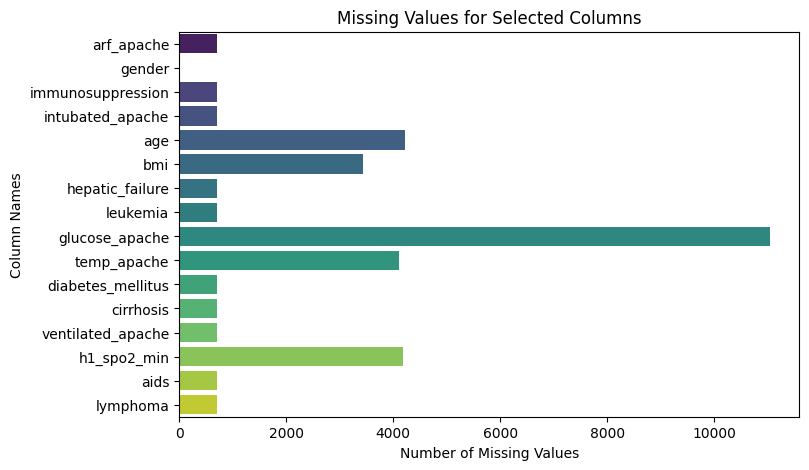

In [ ]:
# Define the columns you want to check for missing values
columns_to_check = ['arf_apache', 'gender', 'immunosuppression', 'intubated_apache','age', 'bmi', 'hepatic_failure', 'leukemia',
                   'glucose_apache', 'temp_apache', 'diabetes_mellitus', 'cirrhosis', 'ventilated_apache', 'h1_spo2_min', 'aids', 'lymphoma']

# Calculate missing values count for the specified columns
missing_value_counts = data[columns_to_check].isnull().sum()


# If you want to display this as a DataFrame for better visualization:
missing_values_df = missing_value_counts.reset_index()
missing_values_df.columns = ['column_name', 'missing_count']
print(missing_values_df)

# Alternatively, to plot:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(x='missing_count', y='column_name', data=missing_values_df, palette='viridis')
plt.title('Missing Values for Selected Columns')
plt.xlabel('Number of Missing Values')
plt.ylabel('Column Names')
plt.show()



Most of the variables have missing value.

How to deal with it?

In [ ]:
# Summary statistics
summary_stats = data[columns_to_check].describe()
print(summary_stats)

         arf_apache  immunosuppression  intubated_apache           age  \
count  90998.000000       90998.000000      90998.000000  87485.000000   
mean       0.027979           0.026165          0.151223     62.309516   
std        0.164912           0.159628          0.358268     16.775119   
min        0.000000           0.000000          0.000000     16.000000   
25%        0.000000           0.000000          0.000000     52.000000   
50%        0.000000           0.000000          0.000000     65.000000   
75%        0.000000           0.000000          0.000000     75.000000   
max        1.000000           1.000000          1.000000     89.000000   

                bmi  hepatic_failure      leukemia  glucose_apache  \
count  88284.000000     90998.000000  90998.000000    80677.000000   
mean      29.185818         0.012989      0.007066      160.326822   
std        8.275142         0.113229      0.083763       90.790551   
min       14.844926         0.000000      0.000000   

In [ ]:
# Checking distribution of hospital death (outcome) variable
# Compute the count of each class in the 'target' column
counts = data['hospital_death'].value_counts()
print(counts)

# Define colors for the pie chart sections
colors = ['#a3416c', '#ebc898']

# Construct a pie chart with plotly
# 'names' are the class labels, and 'values' are the counts for each class
fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # creates a donut-styled pie chart
    title='Distribution of Classes in "Death"',
    color_discrete_sequence=colors)

# Update the layout of the pie chart for better presentation and clarity
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='Death'),
    title=dict(
        text='Distribution of Classes in "Death"',
        x=0.45,
        xanchor='center',
        y=0.95,
        yanchor='top',
        font=dict(size=16)),
    width=500,
    height=350)

# Display the pie chart
fig.show()

0    83798
1     7915
Name: hospital_death, dtype: int64


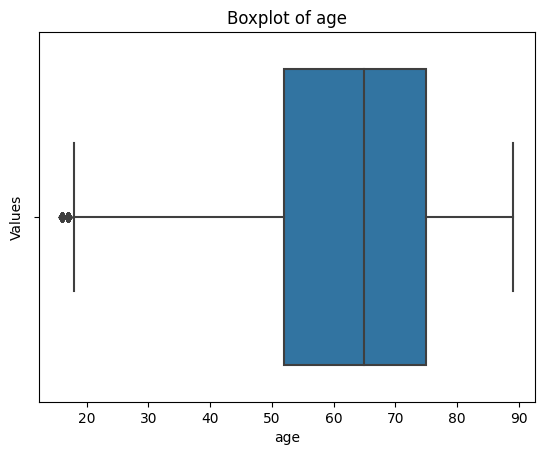

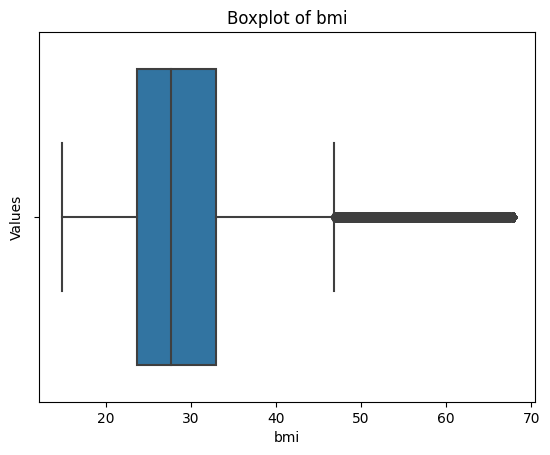

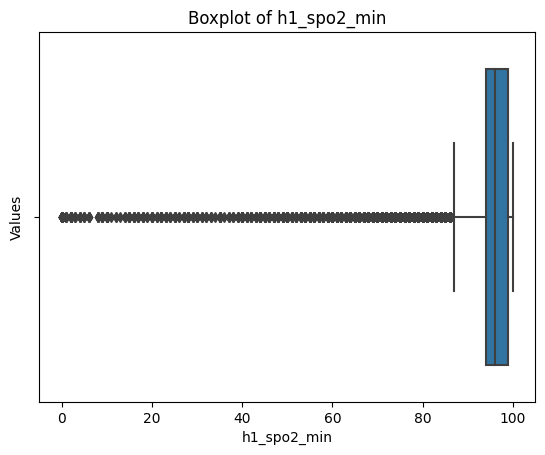

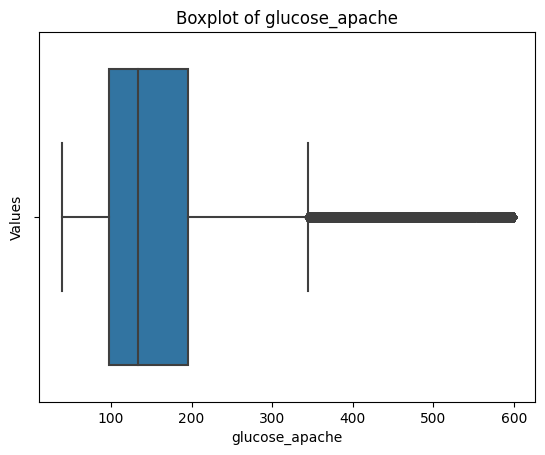

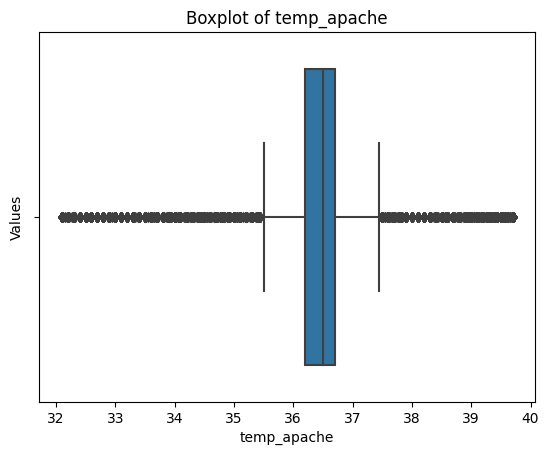

In [ ]:
# Specify columns to plot
columns_to_plot = ['age', 'bmi','h1_spo2_min','glucose_apache', 'temp_apache']

# Create boxplot
for column in columns_to_plot:
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.show()

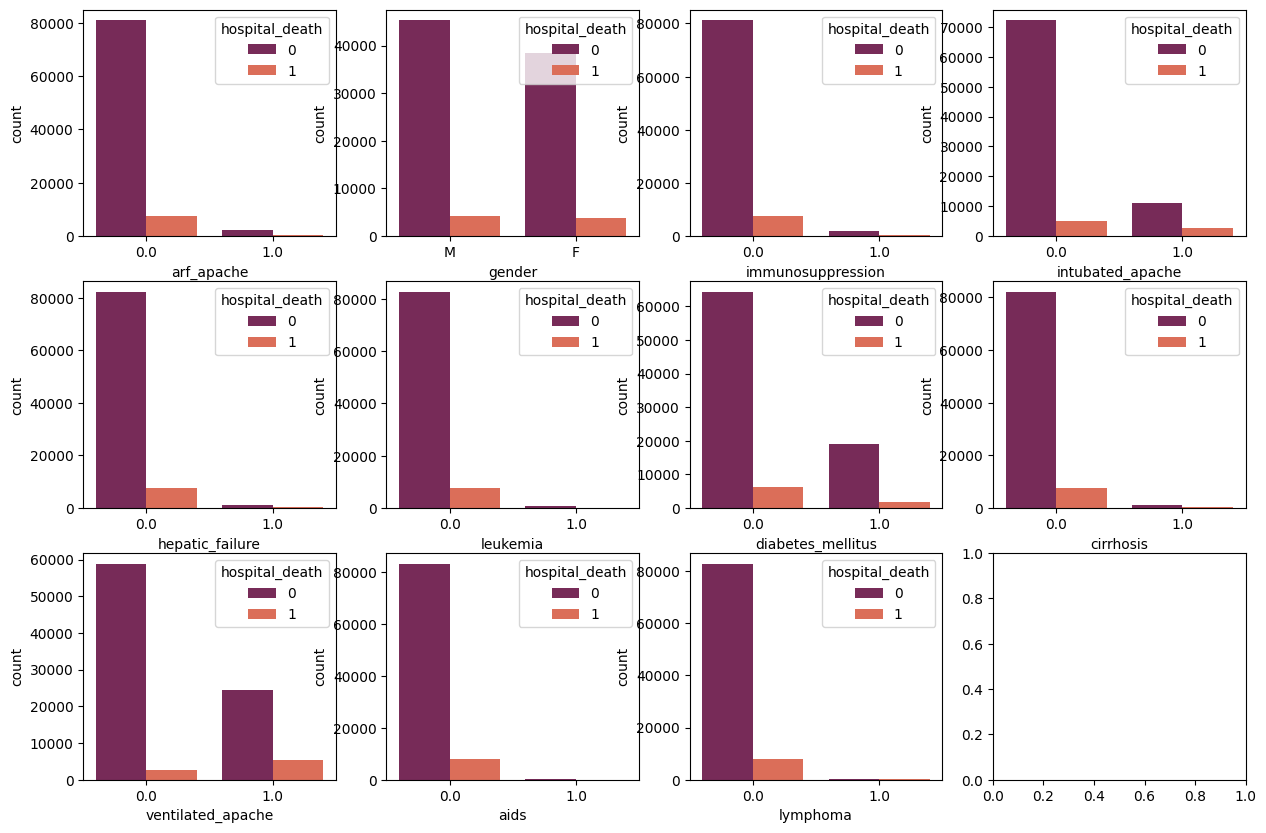

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Checking the difference in the distribution of categorical features across two classes of the outcome

# Initialize a 3x3 grid of subplots
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(15, 10))

# Loop through each categorical column to plot its distribution
categorical_columns = ['arf_apache', 'gender', 'immunosuppression', 'intubated_apache', 'hepatic_failure', 'leukemia',
                   'diabetes_mellitus', 'cirrhosis', 'ventilated_apache', 'aids', 'lymphoma']
for i, column in enumerate(categorical_columns):
    # Determine the subplot's position based on the current index
    x = i // 4
    y = i % 4

    # Create a count plot for the current column
    # The hue parameter divides the counts based on the 'target' column,
    # allowing for a comparison between the classes.
    sns.countplot(data=data, x=column, hue='hospital_death', palette='rocket', ax=axs[x][y])

# Display all the plots
plt.show()

Except gender, seems like all other variables are associated with Y(hospital_death)

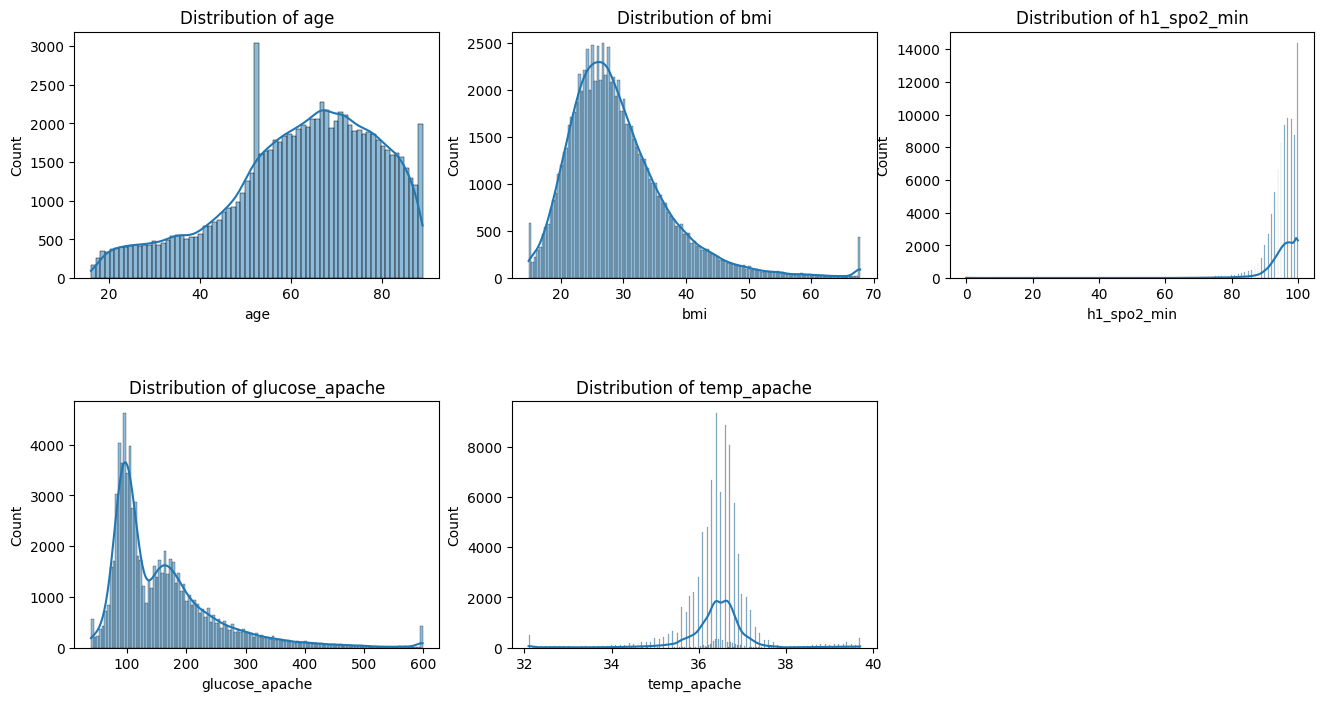

In [ ]:
# Creating histograms to visualize continuous variables
continuousVariables = ['age', 'bmi','h1_spo2_min','glucose_apache', 'temp_apache']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(continuousVariables):
    sns.histplot(data[continuousVariables[i]], ax=axes[i//3, i%3], kde=True)
    axes[i//3, i%3].set_title(f'Distribution of {col}')
if len(continuousVariables) < 6:
    fig.delaxes(axes[1, len(continuousVariables) % 3])

plt.show()

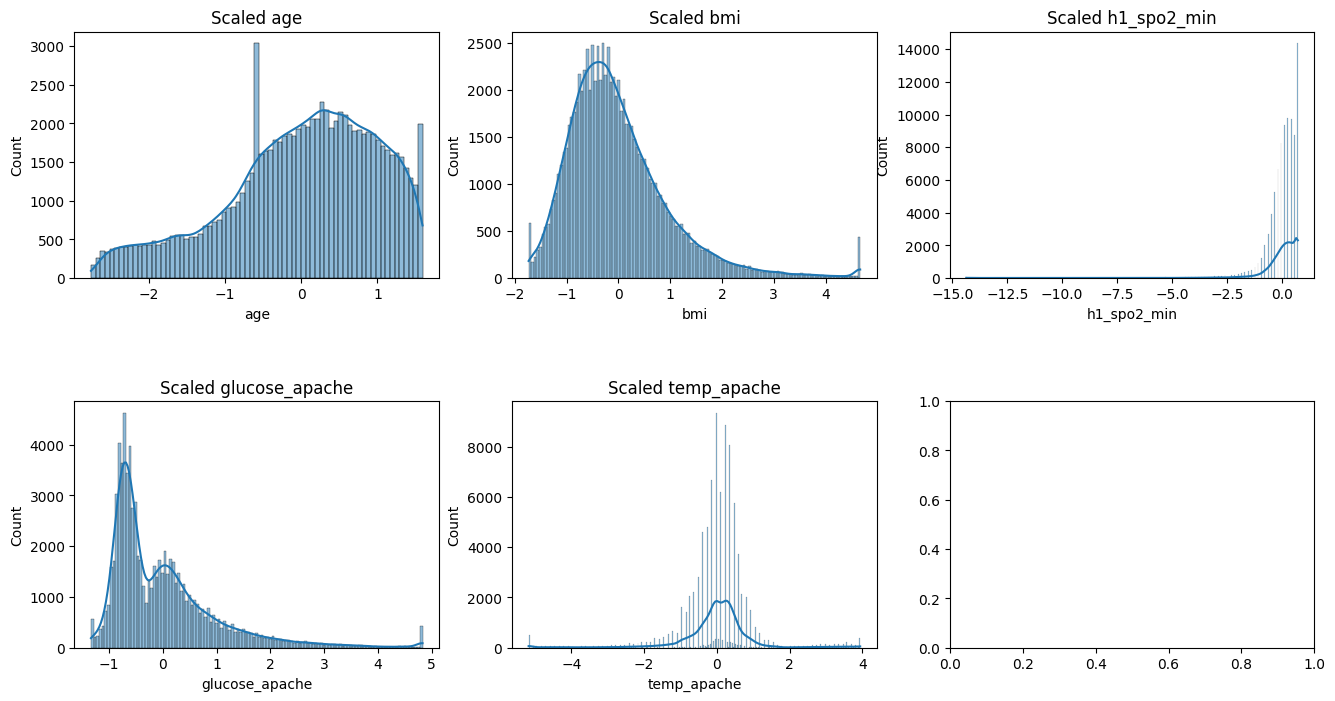

In [ ]:
scaler = StandardScaler()

# Scale the continuous variables
scaled_variables = scaler.fit_transform(data[continuousVariables])

# Create a DataFrame from the scaled variables using the column names from continuousVariables
scaled_df = pd.DataFrame(scaled_variables, columns=continuousVariables)

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
fig.subplots_adjust(hspace=0.5)

# Create histograms for scaled continuous variables
for i, col in enumerate(scaled_df.columns):
    sns.histplot(scaled_df[col], ax=axes[i//3, i%3], kde=True)
    axes[i//3, i%3].set_title(f'Scaled {col}')

plt.show()


In [ ]:
#Defining a Z-score threshold
zscore_threshold = 4

# Iterate through each continuous variable and print potential outliers
for variable_name in continuousVariables:
    data_column = data[variable_name]
    z_scores = (data_column - data_column.mean()) / data_column.std()
    outliers = data_column[abs(z_scores) > zscore_threshold]
    print(f"Outliers in '{variable_name}':")
    print(outliers)
    print("\n")

Outliers in 'age':
Series([], Name: age, dtype: float64)


Outliers in 'bmi':
193      64.109104
348      67.814990
412      64.169307
453      67.814990
578      67.814990
           ...    
91294    67.814990
91308    67.814990
91362    67.814990
91426    67.814990
91675    67.814990
Name: bmi, Length: 671, dtype: float64


Outliers in 'h1_spo2_min':
414      16.0
634      47.0
770      51.0
916      64.0
1083     33.0
         ... 
91270    63.0
91312    30.0
91368    57.0
91432    40.0
91691    53.0
Name: h1_spo2_min, Length: 696, dtype: float64


Outliers in 'glucose_apache':
41       598.7
107      598.7
362      552.0
384      598.7
514      556.0
         ...  
91156    598.7
91208    598.7
91209    598.7
91594    598.7
91710    538.0
Name: glucose_apache, Length: 691, dtype: float64


Outliers in 'temp_apache':
25       32.1
41       32.1
97       32.1
298      32.5
415      32.1
         ... 
91388    32.4
91393    32.5
91409    33.0
91432    32.1
91569    32.9
Name: temp_apa

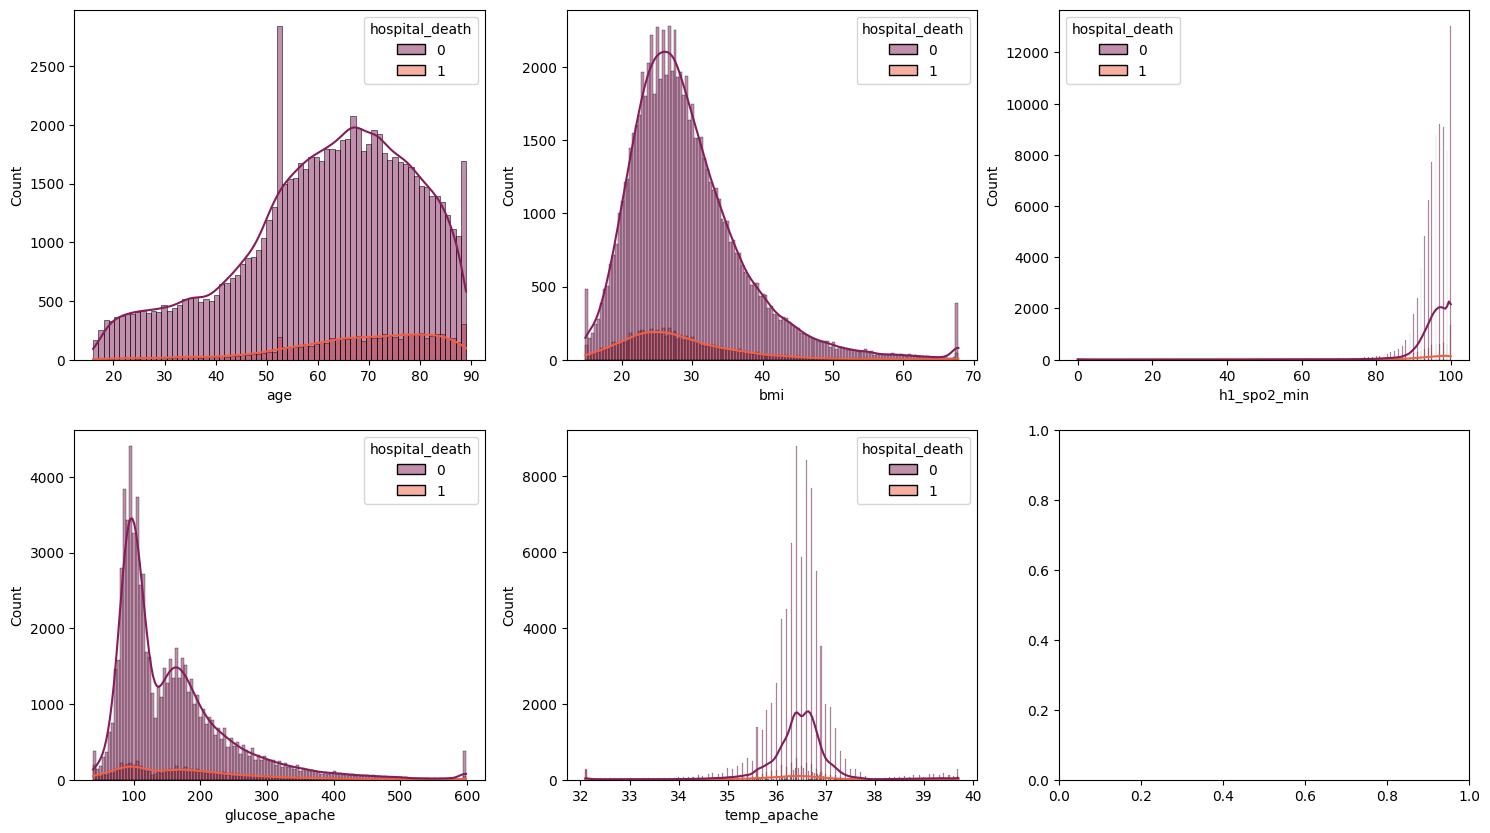

In [ ]:
 #Checking the difference in the distribution of continuous features across two classes of the outcome

# Create a grid of subplots with 2 rows and 3 columns
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(18, 10))

# Create list of numerical columns
numerical_columns = ['age', 'bmi','h1_spo2_min','glucose_apache', 'temp_apache']

# Loop over each feature in numerical and multinomial lists
for i, column in enumerate(numerical_columns):
    # Calculate the position for the subplot; x is the row index and y is the column index
    x = i // 3
    y = i % 3

    # Plot a histogram of the feature split by the 'target' class
    # kde=True adds a Kernel Density Estimate plot to smooth the histogram, providing a clearer view of the data distribution
    sns.histplot(data, x=column, hue='hospital_death', kde=True, palette='rocket', ax=axs[x][y])

# Display all the subplots
plt.show()


# Preprocessing


In [ ]:
selected_features = ['arf_apache', 'gender', 'immunosuppression', 'intubated_apache', 'hepatic_failure', 'leukemia',
                   'diabetes_mellitus', 'cirrhosis', 'ventilated_apache', 'aids', 'lymphoma', 'age',
                     'hospital_death', # target
                     'bmi','h1_spo2_min','glucose_apache', 'temp_apache'] # continous

In [ ]:
#select factors
df = data[selected_features]

df.head()

,arf_apache,gender,immunosuppression,intubated_apache,hepatic_failure,leukemia,diabetes_mellitus,cirrhosis,ventilated_apache,aids,lymphoma,age,hospital_death,bmi,h1_spo2_min,glucose_apache,temp_apache
0,0.0,M,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,68.0,0,22.73,74.0,168.0,39.3
1,0.0,F,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,77.0,0,27.42,70.0,145.0,35.1
2,0.0,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0,31.95,91.0,NaN,36.7
3,0.0,F,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,81.0,0,22.64,99.0,185.0,34.8
4,0.0,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0,NaN,100.0,NaN,36.7


In [ ]:
null_values = df[selected_features].isnull().sum()

print("Null values in selected features:")
print(null_values)

Null values in selected features:
arf_apache             715
gender                  25
immunosuppression      715
intubated_apache       715
hepatic_failure        715
leukemia               715
diabetes_mellitus      715
cirrhosis              715
ventilated_apache      715
aids                   715
lymphoma               715
age                   4228
hospital_death           0
bmi                   3429
h1_spo2_min           4185
glucose_apache       11036
temp_apache           4108
dtype: int64


In [ ]:
# Unique values in column
df['gender'].unique()

array(['M', 'F', nan], dtype=object)

In [ ]:
# Unique values in column
df['hospital_death'].unique()

array([0, 1])

The following pipeline will replace missing values with the mean for numerical features and use one-hot encoding for the 'gender' column.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer

class NanMeanImputer(TransformerMixin):
    def fit(self, X, y=None):
        # Fit the transformer by calculating the mean
        self.mean = X.mean()
        return self

    def transform(self, X):
        # Transform by filling missing values with the previously calculated mean
        return X.fillna(self.mean)

    def get_feature_names_out(self, input_features=None):
        # Return the input features as-is, as there are no new features added
        return input_features

# Define the transformer for numerical features
num_transformer = Pipeline(
    steps=[
        ("imputer", NanMeanImputer()),  # Use NanMeanImputer for mean imputation
        ("encoder", PowerTransformer())  # Use PowerTransformer for numerical transformation
    ])

# Define the transformer for categorical features
cat_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy='most_frequent')),  # Use most frequent strategy for missing values
        ("encoder", OneHotEncoder(handle_unknown='ignore'))  # Use OneHotEncoder for one-hot encoding
    ])

# Specify the columns for numerical and categorical features
continuous_cols = ['bmi','h1_spo2_min','glucose_apache', 'temp_apache']
categorical_cols = ['arf_apache', 'immunosuppression', 'intubated_apache', 'hepatic_failure', 'leukemia',
                   'diabetes_mellitus', 'cirrhosis', 'ventilated_apache', 'aids', 'lymphoma','gender']

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, continuous_cols),  # Apply num_transformer to numerical columns
        ('cat', cat_transformer, categorical_cols),  # Apply cat_transformer to categorical columns
        ('target', 'passthrough', ['hospital_death'])  # Include 'hospital_death' without any changes
    ])

# Create the full pipeline
pipeline = Pipeline(
    steps=[("preprocessor", preprocessor)]
)

# Fit the pipeline to your data
pipe_fit = pipeline.fit(df)

# Transform the data
data = pd.DataFrame(pipe_fit.transform(df), columns=pipe_fit.get_feature_names_out().tolist())
data.columns.tolist()


['num__bmi',
 'num__h1_spo2_min',
 'num__glucose_apache',
 'num__temp_apache',
 'cat__arf_apache_0.0',
 'cat__arf_apache_1.0',
 'cat__immunosuppression_0.0',
 'cat__immunosuppression_1.0',
 'cat__intubated_apache_0.0',
 'cat__intubated_apache_1.0',
 'cat__hepatic_failure_0.0',
 'cat__hepatic_failure_1.0',
 'cat__leukemia_0.0',
 'cat__leukemia_1.0',
 'cat__diabetes_mellitus_0.0',
 'cat__diabetes_mellitus_1.0',
 'cat__cirrhosis_0.0',
 'cat__cirrhosis_1.0',
 'cat__ventilated_apache_0.0',
 'cat__ventilated_apache_1.0',
 'cat__aids_0.0',
 'cat__aids_1.0',
 'cat__lymphoma_0.0',
 'cat__lymphoma_1.0',
 'cat__gender_F',
 'cat__gender_M',
 'target__hospital_death']

In [ ]:
null_values = data[data.columns.tolist()].isnull().sum()

print("Null values in selected features:")
print(null_values)

Null values in selected features:
num__bmi                      0
num__h1_spo2_min              0
num__glucose_apache           0
num__temp_apache              0
cat__arf_apache_0.0           0
cat__arf_apache_1.0           0
cat__immunosuppression_0.0    0
cat__immunosuppression_1.0    0
cat__intubated_apache_0.0     0
cat__intubated_apache_1.0     0
cat__hepatic_failure_0.0      0
cat__hepatic_failure_1.0      0
cat__leukemia_0.0             0
cat__leukemia_1.0             0
cat__diabetes_mellitus_0.0    0
cat__diabetes_mellitus_1.0    0
cat__cirrhosis_0.0            0
cat__cirrhosis_1.0            0
cat__ventilated_apache_0.0    0
cat__ventilated_apache_1.0    0
cat__aids_0.0                 0
cat__aids_1.0                 0
cat__lymphoma_0.0             0
cat__lymphoma_1.0             0
cat__gender_F                 0
cat__gender_M                 0
target__hospital_death        0
dtype: int64


# Neural Networks

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import torch.nn.functional as F

# Define feature columns
feature_columns = data.columns.tolist()[:-1]

# Define target column
target_column = 'target__hospital_death'

# Extract features and labels
features = data[feature_columns].values
labels = data[target_column].values

# Standardize the features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Convert to PyTorch tensors
features_tensor = torch.tensor(features, dtype=torch.float32)
labels_tensor = torch.tensor(labels, dtype=torch.float32)

# Create a TensorDataset
dataset = TensorDataset(features_tensor, labels_tensor)

# Split the data into training and testing sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Define your neural network model
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.dropout3 = nn.Dropout(0.5)
        self.fc4 = nn.Linear(64, 1)

    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout3(x)
        x = self.fc4(x)
        return x

# Initialize the model
input_size = len(feature_columns)
model = NeuralNetwork(input_size)

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

# Training loop
num_epochs = 20
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

for epoch in range(num_epochs):
    model.train()
    for batch_features, batch_labels in train_loader:
        optimizer.zero_grad()

        # Forward pass without sigmoid activation
        outputs = model(batch_features)

        # Ensure target tensor has the same shape as the output tensor
        batch_labels = batch_labels.view(-1, 1)

        loss = criterion(outputs, batch_labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluation section
model.eval()
with torch.no_grad():
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    all_predictions = []
    all_labels = []
    for batch_features, batch_labels in val_loader:
        outputs = model(batch_features)
        predicted_labels = (torch.sigmoid(outputs) >= 0.5).float()
        all_predictions.append(predicted_labels)
        all_labels.append(batch_labels)

# Concatenate predictions and labels
all_predictions = torch.cat(all_predictions).numpy()
all_labels = torch.cat(all_labels).numpy()

# Calculate evaluation metrics
accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
recall = recall_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions)
roc_auc = roc_auc_score(all_labels, all_predictions)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')


Epoch [1/20], Loss: 0.2865
Epoch [2/20], Loss: 0.1771
Epoch [3/20], Loss: 0.1962
Epoch [4/20], Loss: 0.3497
Epoch [5/20], Loss: 0.1103
Epoch [6/20], Loss: 0.0752
Epoch [7/20], Loss: 0.5035
Epoch [8/20], Loss: 0.2355
Epoch [9/20], Loss: 0.3471
Epoch [10/20], Loss: 0.2956
Epoch [11/20], Loss: 0.1589
Epoch [12/20], Loss: 0.2471
Epoch [13/20], Loss: 0.1860
Epoch [14/20], Loss: 0.2826
Epoch [15/20], Loss: 0.4620
Epoch [16/20], Loss: 0.3677
Epoch [17/20], Loss: 0.1630
Epoch [18/20], Loss: 0.3910
Epoch [19/20], Loss: 0.1469
Epoch [20/20], Loss: 0.1748
Accuracy: 0.9152
Precision: 0.6154
Recall: 0.0455
F1 Score: 0.0848
ROC AUC Score: 0.5214


It seems like the model is achieving high recall but low precision, resulting in an overall low accuracy. This indicates that the model is predicting a significant number of positive instances (hospital_death), but a substantial portion of these predictions are false positives. To enhance the model's performance, it's essential to investigate whether there's a considerable class imbalance in the dataset. If such an imbalance exists, consider applying techniques like oversampling the minority class, undersampling the majority class, or adjusting class weights during training.

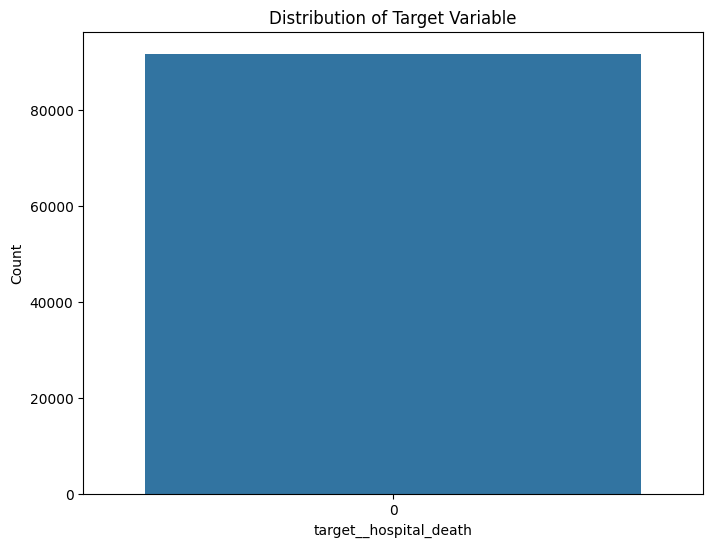

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'target__hospital_death' is your target variable
target_variable = 'target__hospital_death'

# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data[target_variable])
plt.title('Distribution of Target Variable')
plt.xlabel(target_variable)
plt.ylabel('Count')
plt.show()


In [ ]:
class_distribution = data[target_variable].value_counts()
print("Class Distribution:")
print(class_distribution)


Class Distribution:
0.0    83798
1.0     7915
Name: target__hospital_death, dtype: int64


It appears there is a class imbalance in our target variable. Class 0 has significantly more instances than Class 1. In ML, class imbalance can sometimes lead to biased models that perform poorly on the minority class.

The following code incorporates oversampling to address class imbalance and standardizes the features before training the neural network.

In [ ]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# 'target_column' is our target variable
target_column = 'target__hospital_death'

# Extract features and labels
features = data.drop(target_column, axis=1)
labels = data[target_column]

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, test_size=0.2, random_state=42
)

# Apply oversampling to balance classes in the training set
oversampler = RandomOverSampler(random_state=42)
train_features_resampled, train_labels_resampled = oversampler.fit_resample(
    train_features, train_labels
)

# Standardize the features
scaler = StandardScaler()
train_features_resampled = scaler.fit_transform(train_features_resampled)
test_features = scaler.transform(test_features)

# Convert to PyTorch tensors
features_tensor = torch.tensor(train_features_resampled, dtype=torch.float32)
labels_tensor = torch.tensor(train_labels_resampled.values, dtype=torch.float32)

# Create a TensorDataset
dataset = TensorDataset(features_tensor, labels_tensor)

# Split the data into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Define your neural network model
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Initialize the model
input_size = train_features_resampled.shape[1]
model = NeuralNetwork(input_size)

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

# Training loop
num_epochs = 30
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

for epoch in range(num_epochs):
    model.train()
    for batch_features, batch_labels in train_loader:
        optimizer.zero_grad()

        # Forward pass without sigmoid activation
        outputs = model(batch_features)

        # Ensure target tensor has the same shape as the output tensor
        batch_labels = batch_labels.view(-1, 1)

        loss = criterion(outputs, batch_labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluation section
model.eval()
with torch.no_grad():
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    all_predictions = []
    all_labels = []
    for batch_features, batch_labels in val_loader:
        outputs = model(batch_features)
        predicted_labels = (torch.sigmoid(outputs) >= 0.5).float()
        all_predictions.append(predicted_labels)
        all_labels.append(batch_labels)

# Concatenate predictions and labels
all_predictions = torch.cat(all_predictions).numpy()
all_labels = torch.cat(all_labels).numpy()

# Calculate evaluation metrics
accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
recall = recall_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions)
roc_auc = roc_auc_score(all_labels, all_predictions)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')


Epoch [1/30], Loss: 0.3673
Epoch [2/30], Loss: 0.6101
Epoch [3/30], Loss: 0.8217
Epoch [4/30], Loss: 0.3597
Epoch [5/30], Loss: 0.5914
Epoch [6/30], Loss: 0.2838
Epoch [7/30], Loss: 0.4043
Epoch [8/30], Loss: 0.8373
Epoch [9/30], Loss: 0.4509
Epoch [10/30], Loss: 0.2800
Epoch [11/30], Loss: 0.4549
Epoch [12/30], Loss: 0.6048
Epoch [13/30], Loss: 0.5114
Epoch [14/30], Loss: 0.3553
Epoch [15/30], Loss: 0.1183
Epoch [16/30], Loss: 1.1866
Epoch [17/30], Loss: 0.8034
Epoch [18/30], Loss: 0.5777
Epoch [19/30], Loss: 0.9357
Epoch [20/30], Loss: 0.3682
Epoch [21/30], Loss: 0.9388
Epoch [22/30], Loss: 0.3427
Epoch [23/30], Loss: 0.4892
Epoch [24/30], Loss: 0.5491
Epoch [25/30], Loss: 0.4651
Epoch [26/30], Loss: 0.4105
Epoch [27/30], Loss: 0.3834
Epoch [28/30], Loss: 0.6338
Epoch [29/30], Loss: 0.7453
Epoch [30/30], Loss: 0.7642
Accuracy: 0.7098
Precision: 0.7162
Recall: 0.6878
F1 Score: 0.7017
ROC AUC Score: 0.7096


Now, the model's performance is more balanced across precision, recall, and accuracy. The values are relatively close, indicating a good trade-off between different metrics.


The results from the neural network model evaluation indicate a relatively balanced performance across multiple metrics. Here's an analysis of each metric:

**Accuracy (0.7098):**

This metric represents the overall correctness of your model.
The accuracy of 70.98% suggests that the model is making correct predictions on about 70.98% of the samples.

**Precision (0.7162):**

Precision is the ratio of correctly predicted positive observations to the total predicted positives.
A precision of 71.62% indicates that when the model predicts the positive class, it is correct about 71.62% of the time.

**Recall (0.6878):**

Recall (Sensitivity or True Positive Rate) is the ratio of correctly predicted positive observations to the all observations in the actual class.
A recall of 7017% suggests that the model is able to capture about 68.78% of the actual positive instances.

**F1 Score (0.7017):**

The F1 Score is the weighted average of precision and recall. It considers both false positives and false negatives.
An F1 Score of 70.17% indicates a good balance between precision and recall.

**ROC AUC Score (0.7096):**

The Receiver Operating Characteristic Area Under the Curve (ROC AUC) measures the area under the ROC curve, which represents the trade-off between sensitivity and specificity.
A ROC AUC Score of 70.96% suggests that the model has a reasonable balance between true positive rate and false positive rate.

## Deeper Architecture
The following codes implement a more complex neural network architecture to enhance the model performance.

In [ ]:
import torch.nn.functional as F

# Define neural network model with increased complexity
class ComplexNeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(ComplexNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)  # Add dropout for regularization
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Initialize the complex model
complex_model = ComplexNeuralNetwork(input_size)

# Define loss function and optimizer
criterion_complex = nn.BCEWithLogitsLoss()
optimizer_complex = optim.Adam(complex_model.parameters(), lr=0.0005)

# Training loop for the complex model
num_epochs = 30
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

for epoch in range(num_epochs):
    complex_model.train()
    for batch_features, batch_labels in train_loader:
        optimizer_complex.zero_grad()

        # Forward pass without sigmoid activation
        outputs_complex = complex_model(batch_features)

        # Ensure target tensor has the same shape as the output tensor
        batch_labels = batch_labels.view(-1, 1)

        loss_complex = criterion_complex(outputs_complex, batch_labels)
        loss_complex.backward()
        optimizer_complex.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss_complex.item():.4f}')

# Evaluation section for the complex model
complex_model.eval()
with torch.no_grad():
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    all_predictions_complex = []
    all_labels_complex = []
    for batch_features, batch_labels in val_loader:
        outputs_complex = complex_model(batch_features)
        predicted_labels_complex = (torch.sigmoid(outputs_complex) >= 0.5).float()
        all_predictions_complex.append(predicted_labels_complex)
        all_labels_complex.append(batch_labels)

# Concatenate predictions and labels
all_predictions_complex = torch.cat(all_predictions_complex).numpy()
all_labels_complex = torch.cat(all_labels_complex).numpy()

# Calculate evaluation metrics for the complex model
accuracy_complex = accuracy_score(all_labels_complex, all_predictions_complex)
precision_complex = precision_score(all_labels_complex, all_predictions_complex)
recall_complex = recall_score(all_labels_complex, all_predictions_complex)
f1_complex = f1_score(all_labels_complex, all_predictions_complex)
roc_auc_complex = roc_auc_score(all_labels_complex, all_predictions_complex)

# Print the evaluation metrics for the complex model
print(f'Accuracy: {accuracy_complex:.4f}')
print(f'Precision: {precision_complex:.4f}')
print(f'Recall: {recall_complex:.4f}')
print(f'F1 Score: {f1_complex:.4f}')
print(f'ROC AUC Score: {roc_auc_complex:.4f}')


Epoch [1/30], Loss: 0.6064
Epoch [2/30], Loss: 0.6043
Epoch [3/30], Loss: 0.6859
Epoch [4/30], Loss: 0.5994
Epoch [5/30], Loss: 0.6101
Epoch [6/30], Loss: 1.9214
Epoch [7/30], Loss: 0.6030
Epoch [8/30], Loss: 0.4489
Epoch [9/30], Loss: 0.9553
Epoch [10/30], Loss: 0.4484
Epoch [11/30], Loss: 0.4967
Epoch [12/30], Loss: 1.3724
Epoch [13/30], Loss: 0.4694
Epoch [14/30], Loss: 1.3792
Epoch [15/30], Loss: 0.3030
Epoch [16/30], Loss: 0.4327
Epoch [17/30], Loss: 0.8027
Epoch [18/30], Loss: 0.6896
Epoch [19/30], Loss: 0.2206
Epoch [20/30], Loss: 0.5900
Epoch [21/30], Loss: 0.4091
Epoch [22/30], Loss: 0.5634
Epoch [23/30], Loss: 0.8623
Epoch [24/30], Loss: 0.4770
Epoch [25/30], Loss: 0.6485
Epoch [26/30], Loss: 0.3830
Epoch [27/30], Loss: 0.6953
Epoch [28/30], Loss: 0.3859
Epoch [29/30], Loss: 0.8332
Epoch [30/30], Loss: 0.9530
Accuracy: 0.7170
Precision: 0.7076
Recall: 0.7399
F1 Score: 0.7233
ROC AUC Score: 0.7170


In [ ]:
import torch.nn.functional as F

class DeeperNeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(DeeperNeuralNetwork, self).__init__()

        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(384, 64)
        self.fc5 = nn.Linear(448, 1)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x1 = self.relu(self.fc1(x))
        x2 = self.relu(self.fc2(x1))
        x3 = self.relu(self.fc3(torch.cat([x1, x2], dim=1)))
        x4 = self.relu(self.fc4(torch.cat([x1, x2, x3], dim=1)))
        x5 = self.fc5(torch.cat([x1, x2, x3, x4], dim=1))
        return x5

# Initialize the model
complex_model = DeeperNeuralNetwork(input_size)

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(complex_model.parameters(), lr=0.0005)

# Training loop
num_epochs = 30
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

for epoch in range(num_epochs):
    complex_model.train()
    for batch_features, batch_labels in train_loader:
        optimizer.zero_grad()

        # Forward pass without sigmoid activation
        outputs = complex_model(batch_features)

        # Ensure target tensor has the same shape as the output tensor
        batch_labels = batch_labels.view(-1, 1)

        loss = criterion(outputs, batch_labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluation section
complex_model.eval()
with torch.no_grad():
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    all_predictions = []
    all_labels = []
    for batch_features, batch_labels in val_loader:
        outputs = complex_model(batch_features)
        predicted_labels = (torch.sigmoid(outputs) >= 0.5).float()
        all_predictions.append(predicted_labels)
        all_labels.append(batch_labels)

# Concatenate predictions and labels
all_predictions = torch.cat(all_predictions).numpy()
all_labels = torch.cat(all_labels).numpy()

# Calculate evaluation metrics
accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
recall = recall_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions)
roc_auc = roc_auc_score(all_labels, all_predictions)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')


Epoch [1/30], Loss: 0.2056
Epoch [2/30], Loss: 1.0303
Epoch [3/30], Loss: 0.4920
Epoch [4/30], Loss: 0.5763
Epoch [5/30], Loss: 0.4875
Epoch [6/30], Loss: 0.3991
Epoch [7/30], Loss: 0.4464
Epoch [8/30], Loss: 0.7609
Epoch [9/30], Loss: 0.4666
Epoch [10/30], Loss: 0.6506
Epoch [11/30], Loss: 0.2278
Epoch [12/30], Loss: 0.6828
Epoch [13/30], Loss: 0.6361
Epoch [14/30], Loss: 0.4748
Epoch [15/30], Loss: 0.0925
Epoch [16/30], Loss: 0.4476
Epoch [17/30], Loss: 0.1550
Epoch [18/30], Loss: 0.3686
Epoch [19/30], Loss: 0.3013
Epoch [20/30], Loss: 0.7574
Epoch [21/30], Loss: 0.3168
Epoch [22/30], Loss: 0.2964
Epoch [23/30], Loss: 0.4538
Epoch [24/30], Loss: 1.1903
Epoch [25/30], Loss: 0.3292
Epoch [26/30], Loss: 0.9546
Epoch [27/30], Loss: 0.5587
Epoch [28/30], Loss: 0.6420
Epoch [29/30], Loss: 0.5282
Epoch [30/30], Loss: 0.4891
Accuracy: 0.8033
Precision: 0.8063
Recall: 0.7983
F1 Score: 0.8023
ROC AUC Score: 0.8033
